In [73]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats as statPerform
from sklearn.preprocessing import LabelEncoder

In [74]:
avocadoData_analysis = pd.read_csv('~/Desktop/CompleteDataAnalysis/AvocadoPricesAnalysis/avocado.csv')

In [75]:
#df.info() gives you the complete information of the entire dataset
avocadoData_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [76]:
#The Other way of finding whether the dataset has null values is by using the isnull() function

print(avocadoData_analysis.isnull().sum())

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [77]:
#To delete the columns with the missing data we can do 
# axis = 1 removes the entire column and axis = 0 just removes the null rows
updated_avocadoData = avocadoData_analysis.dropna(axis=1)

In [78]:
updated_avocadoData['Date'] = pd.to_datetime(updated_avocadoData['Date'])
updated_avocadoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [79]:
# To delete just null rows 
updated_df_avocadoData = updated_avocadoData.dropna(axis=0)

In [80]:
updated_df_avocadoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [81]:
# Performing Chi Square tests between date and region so that we try to see if 
# relationships are Significant 

# Identify categorical variables
categorical_vars = ['type', 'region', 'Date']

# Calculate correlations and additional statistics
results = []
for i in range(len(categorical_vars)):
    for j in range(i + 1, len(categorical_vars)):
        contingency_table = pd.crosstab(updated_df_avocadoData[categorical_vars[i]], updated_df_avocadoData[categorical_vars[j]])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        results.append({
            'Variable Pair': f"{categorical_vars[i]} vs {categorical_vars[j]}",
            'Chi-square Statistic': chi2,
            'P-value': p_value,
            'Degrees of Freedom': dof
        })

# Convert results to a DataFrame and sort by Chi-square Statistic
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Chi-square Statistic', ascending=False)

# Display the results
print(results_df)

    Variable Pair  Chi-square Statistic  P-value  Degrees of Freedom
2  region vs Date              1.472432      1.0                8904
1    type vs Date              0.027544      1.0                 168
0  type vs region              0.026372      1.0                  53


Top 3 correlated pairs:
Small Bags - Total Bags: 0.9943
Large Bags - Total Bags: 0.9430
4225 - 4046: 0.9261


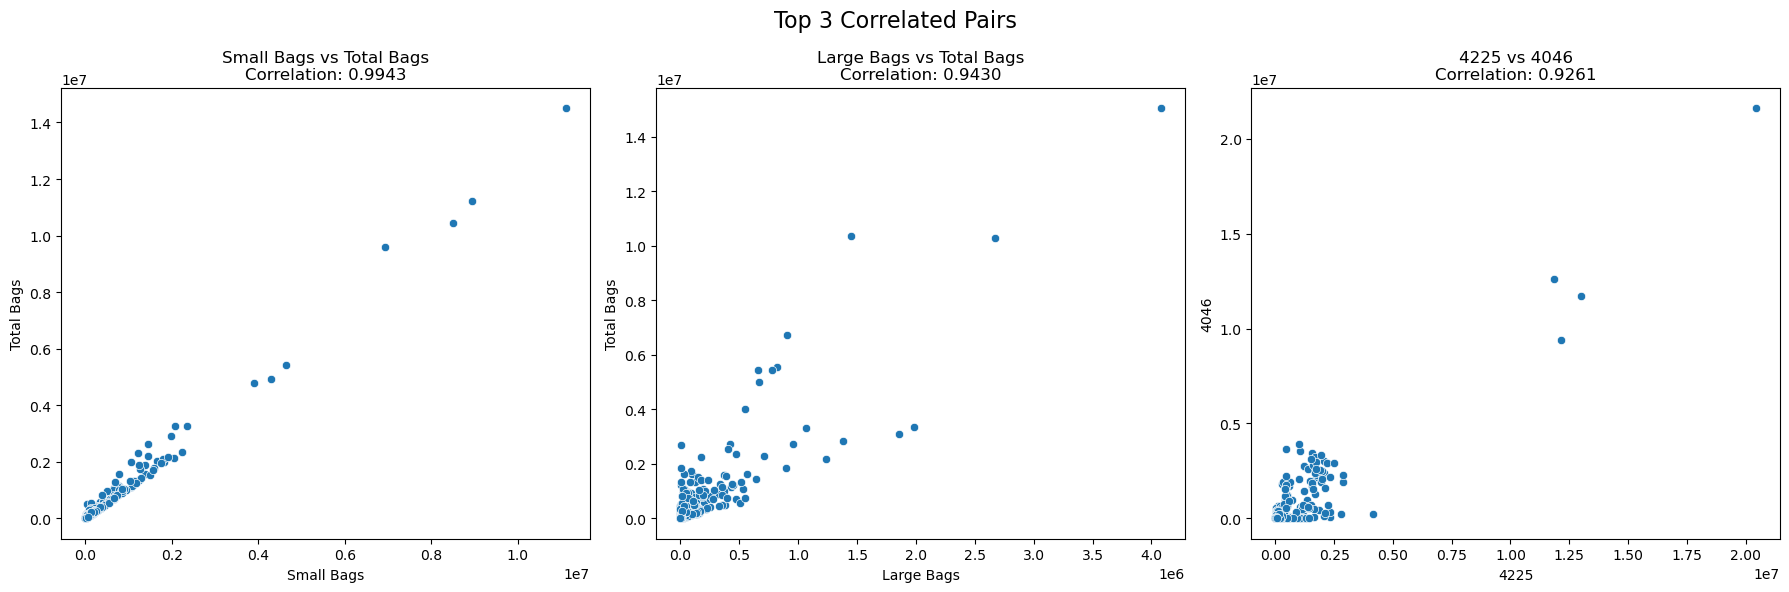

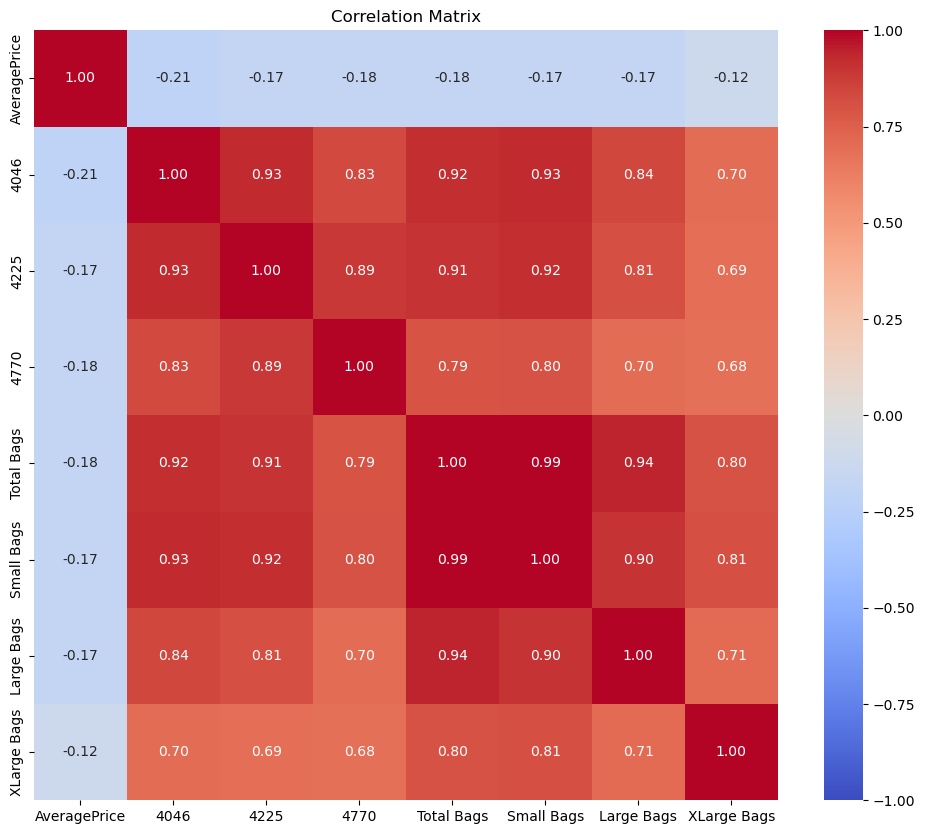

In [82]:
numeric_cols = ['AveragePrice', 'TotalVolume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Year']

numeric_cols = [col for col in numeric_cols if col in updated_df_avocadoData.columns]

# Compute correlation matrix
corr_matrix = updated_df_avocadoData[numeric_cols].corr()

# Get upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find the top 3 correlations
top_correlations = upper_tri.unstack().sort_values(kind="quicksort", ascending=False)[:3]

# Print top 3 correlations
print("Top 3 correlated pairs:")
for (col1, col2), corr in top_correlations.items():
    print(f"{col1} - {col2}: {corr:.4f}")

# Visualize top 3 correlations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Top 3 Correlated Pairs", fontsize=16)

for i, ((col1, col2), corr) in enumerate(top_correlations.items()):
    sns.scatterplot(data=updated_df_avocadoData.sample(1000), x=col1, y=col2, ax=axes[i])  # Sample 1000 points for faster plotting
    axes[i].set_title(f"{col1} vs {col2}\nCorrelation: {corr:.4f}")

plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# The top 3 correlated pairs includes 

# Top 3 correlated pairs:
# Small Bags - Total Bags: 0.9943
# Large Bags - Total Bags: 0.9430
# 4225 - 4046: 0.9261

In [83]:
# Identify categorical and numerical columns
categorical_columns = updated_df_avocadoData.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = updated_df_avocadoData.select_dtypes(include=[np.number]).columns.tolist()

# List to store results of statistical tests
test_results = []

# Function to check if variance is too low (i.e., nearly identical values)
def has_low_variance(series):
    return series.var() < 1e-6  # Threshold for low variance

# Loop through all combinations of categorical and numerical columns
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        # Check if the categorical variable is binary or multi-level
        if updated_df_avocadoData[cat_col].nunique() == 2:
            # Perform T-Test for binary categorical variables
            group1 = updated_df_avocadoData[updated_df_avocadoData[cat_col] == updated_df_avocadoData[cat_col].unique()[0]][num_col]
            group2 = updated_df_avocadoData[updated_df_avocadoData[cat_col] == updated_df_avocadoData[cat_col].unique()[1]][num_col]
            
            # Skip if either group has low variance
            if has_low_variance(group1) or has_low_variance(group2):
                continue
            
            t_stat, p_value = statPerform.ttest_ind(group1, group2)
            test_type = 'T-Test'
        else:
            # Perform ANOVA for multi-level categorical variables
            groups = [updated_df_avocadoData[updated_df_avocadoData[cat_col] == category][num_col] for category in updated_df_avocadoData[cat_col].unique()]
            
            # Skip if any group has low variance
            if any(has_low_variance(group) for group in groups):
                continue
            
            f_stat, p_value = statPerform.f_oneway(*groups)
            test_type = 'ANOVA'
        
        # Store the results
        test_results.append({
            'Categorical Variable': cat_col,
            'Numerical Variable': num_col,
            'P-value': p_value,
            'Test Type': test_type
        })

# Convert results to a DataFrame for easier sorting and viewing
results_df = pd.DataFrame(test_results)

# Sort by P-value to find the top 3 pairs with the strongest association (smallest p-values)
top_3_pairs = results_df.sort_values(by='P-value').head(3)

# Display the top 3 pairs with their respective test type and p-values
print(top_3_pairs)

   Categorical Variable Numerical Variable  P-value Test Type
18               region         Small Bags      0.0     ANOVA
14               region               4046      0.0     ANOVA
13               region       Total Volume      0.0     ANOVA


## Correlation Analysis Results

### Categorical-Categorical Correlations

| Variable Pair    | Chi-square Statistic | P-value | Degrees of Freedom |
|------------------|----------------------|---------|---------------------|
| region vs Date   | 1.472432             | 1.0     | 8904                |
| type vs Date     | 0.027544             | 1.0     | 168                 |
| type vs region   | 0.026372             | 1.0     | 53                  |

### Numerical-Numerical Correlations

1. Small Bags - Total Bags: 0.9943
2. Large Bags - Total Bags: 0.9430
3. 4225 - 4046: 0.9261

### Categorical-Numerical Correlations

| Categorical Variable | Numerical Variable | P-value | Test Type |
|----------------------|--------------------|---------|-----------|
| region               | Small Bags         | 0.0     | ANOVA     |
| region               | 4046               | 0.0     | ANOVA     |
| region               | Total Volume       | 0.0     | ANOVA     |

## Conclusions

1. **Categorical-Categorical**: The chi-square tests show high p-values (1.0) for all pairs, suggesting no significant association between the categorical variables. However, the high degrees of freedom indicate complex relationships that may require further investigation.

2. **Numerical-Numerical**: Strong positive correlations are observed between bag sizes and total bags, as expected. There's also a strong correlation between avocado types 4225 and 4046, which might indicate similar pricing or demand patterns.

3. **Categorical-Numerical**: The ANOVA tests reveal significant relationships (p-value = 0.0) between the 'region' variable and several numerical variables (Small Bags, 4046, Total Volume). This suggests that these metrics vary significantly across different regions.

Overall, the analysis reveals that regional factors have the strongest influence on numerical variables in the avocado dataset. The bag sizes are highly correlated with total bags, which is logical. The lack of significant correlations between categorical variables suggests that factors like type and date may not be strongly related to each other or to regions. Further in-depth analysis might be needed to uncover more subtle relationships in the data.